In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
def to_one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

# Charger les données MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# cast to np.array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Prétraitement des données
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train_one_hot = to_one_hot(y_train)

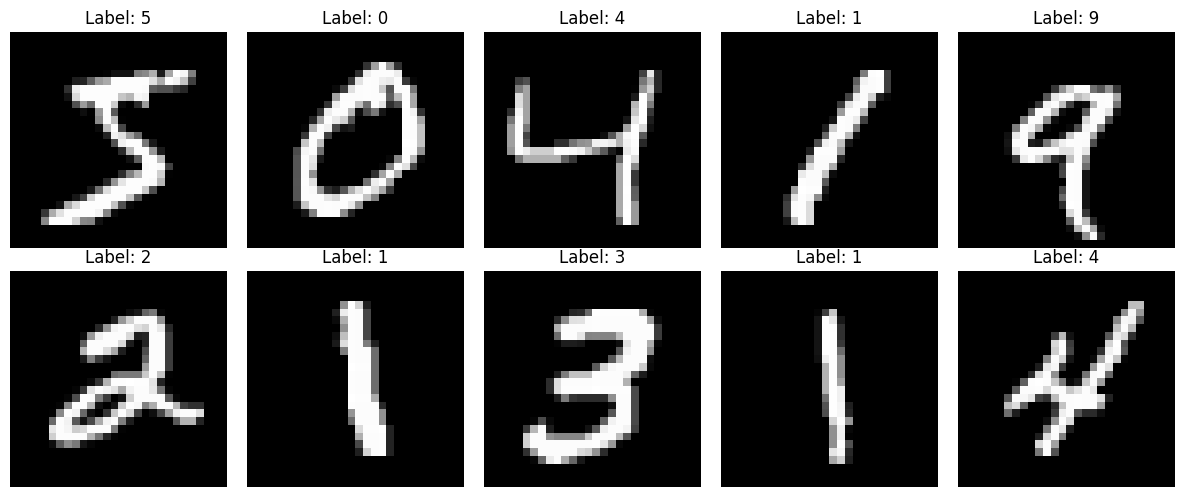

In [3]:
# Visualiser quelques images d'entraînement
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [4]:
#Entrainer le modèle
from LeafNetwork import *
from LeafNetwork import LearningRateUtils


nn = LeafNetwork(784)
nn.add(DenseStable(784, 128))
nn.add(ReLU())
nn.add(DenseStable(128, 64))
nn.add(ReLU())
nn.add(DenseStable(64, 10))

import time
start = time.time()
history = nn.train_with_rollback(X_train[:40000], y_train_one_hot[:40000], epochs=25, learning_rate=0.006, lr_adjustment_func= LearningRateUtils.adaptive_percentage)
end = time.time()
print(f"Temps d'entraînement: {end - start:.2f}s")
nn.save("leaf_mnist_model.json")

Epoch: 0 - Error: 0.038059 - Learning Rate: 0.005000
Epoch: 1 - Error: 0.021663 - Learning Rate: 0.005500
Epoch: 2 - Error: 0.017576 - Learning Rate: 0.006019
Epoch: 3 - Error: 0.015125 - Learning Rate: 0.006439
Epoch: 4 - Error: 0.013396 - Learning Rate: 0.006806
Epoch: 5 - Error: 0.012065 - Learning Rate: 0.007145
Epoch: 6 - Error: 0.010987 - Learning Rate: 0.007464
Epoch: 7 - Error: 0.010094 - Learning Rate: 0.007767
Epoch: 8 - Error: 0.009346 - Learning Rate: 0.008055
Epoch: 9 - Error: 0.008712 - Learning Rate: 0.008328
Epoch: 10 - Error: 0.008176 - Learning Rate: 0.008584
Epoch: 11 - Error: 0.007710 - Learning Rate: 0.008829
Epoch: 12 - Error: 0.007313 - Learning Rate: 0.009056
Epoch: 13 - Error: 0.006981 - Learning Rate: 0.009262
Epoch: 14 - Error: 0.006715 - Learning Rate: 0.009438
Epoch: 15 - Error: 0.006563 - Learning Rate: 0.009545
Epoch: 16 - Error increased. Rolling back. New Learning Rate: 0.004773
Epoch: 17 - Error: 0.006019 - Learning Rate: 0.005005
Epoch: 18 - Error: 0.

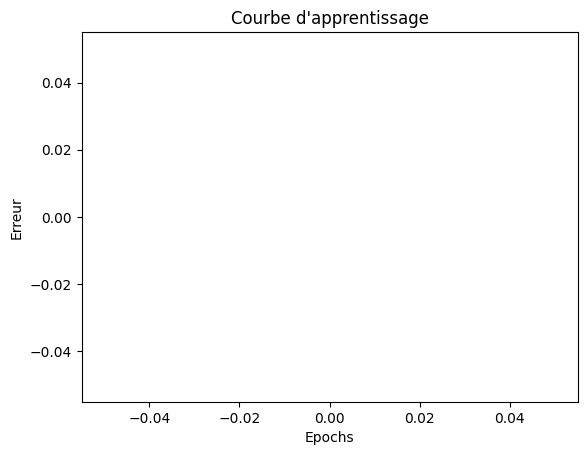

In [15]:
plt.plot(nn.error_history)
plt.title('Courbe d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Erreur')
plt.show()

In [12]:
#load model
last_nn = nn
from LeafNetwork import *
nn = LeafNetwork.load("leaf_mnist_model.json")

The class DenseStable was created without calling the constructor because it has parameters. If you need to perform any initialization at the beginning, please implement the `dynamic_init` method to initialize your values.
The class DenseStable was created without calling the constructor because it has parameters. If you need to perform any initialization at the beginning, please implement the `dynamic_init` method to initialize your values.
The class DenseStable was created without calling the constructor because it has parameters. If you need to perform any initialization at the beginning, please implement the `dynamic_init` method to initialize your values.


In [13]:
# Tester le réseau
predictions = nn.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9672


In [8]:
import numpy as np
import timeit

def test_accuracy(network, X_test, y_test):
    predictions = network.predict(X_test)
    predicted_labels = np.argmax(predictions, axis=1)
    accuracy = np.mean(predicted_labels == y_test)
    return accuracy

def benchmark_nn():
    return test_accuracy(nn, X_test, y_test)

def benchmark_lastnn():
    return test_accuracy(last_nn, X_test, y_test)

lastnn_time = timeit.timeit(benchmark_lastnn, number=1)
lastnn_accuracy = benchmark_lastnn()

nn_time = timeit.timeit(benchmark_nn, number=1)
nn_accuracy = benchmark_nn()



print(f"Loaded NN - Test Accuracy: {nn_accuracy:.4f}, Time: {nn_time:.4f} seconds")
print(f"Original NN - Test Accuracy: {lastnn_accuracy:.4f}, Time: {lastnn_time:.4f} seconds")

Loaded NN - Test Accuracy: 0.9672, Time: 1.0279 seconds
Original NN - Test Accuracy: 0.9707, Time: 1.1124 seconds


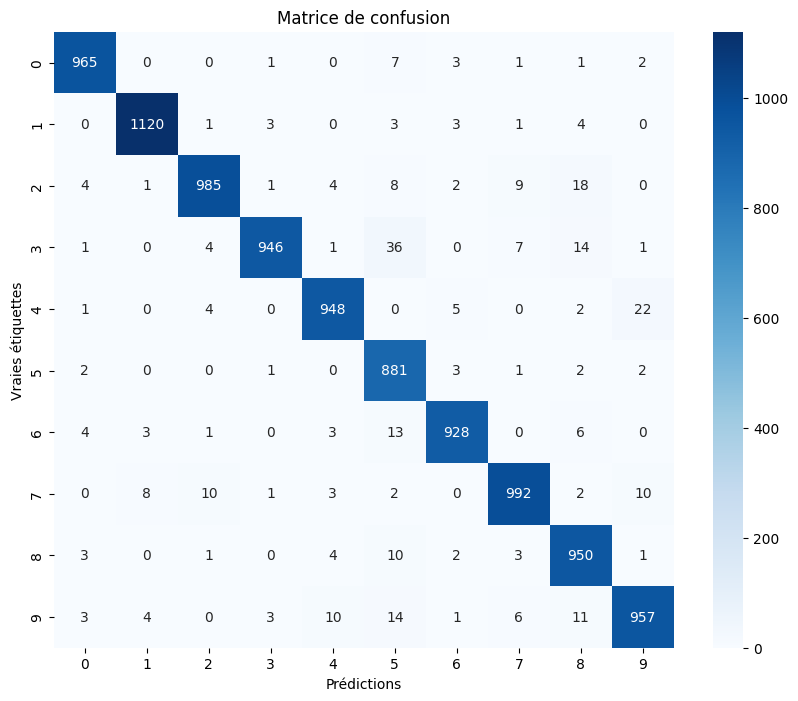

In [9]:
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.savefig('images/confusion_matrix.png')
plt.show()

Score: 15/15


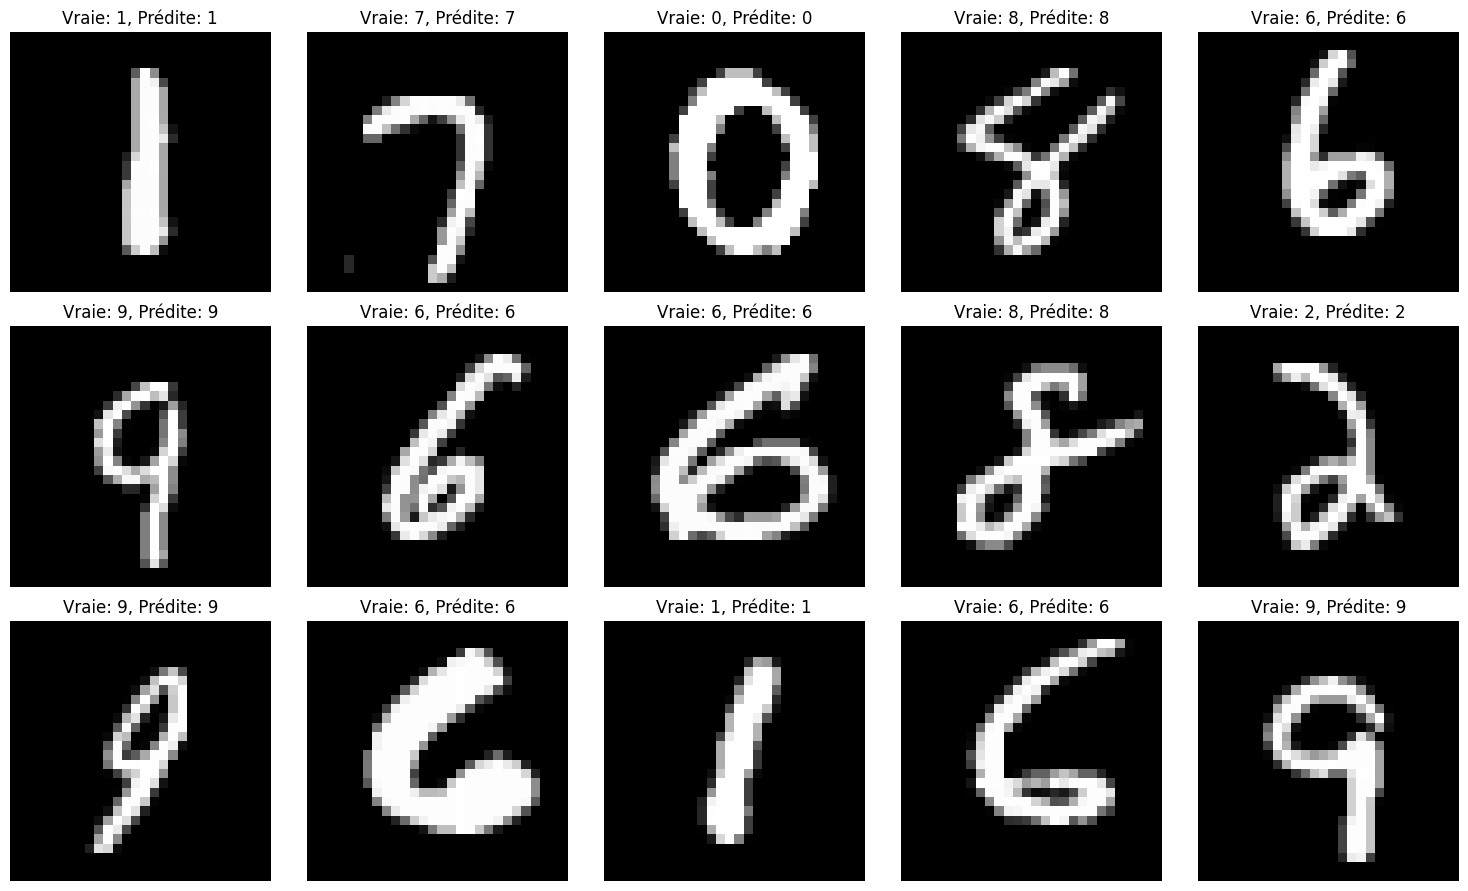

In [11]:
# Visualiser quelques prédictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
current_score = 0
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(X_test))
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'Vraie: {y_test[idx]}, Prédite: {predicted_labels[idx]}')
    if y_test[idx] == predicted_labels[idx]:
        current_score += 1
    ax.axis('off')
plt.tight_layout()
# print score
print(f"Score: {current_score}/{len(axes.flat)}")
plt.show()